In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

# Question 1

In [2]:
%%bash
./exchange_chrRN-\#.sh

In [3]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/week3-assignment/renum_chr.vcf \
  --pca \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/week3-assignment/renum_chr.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34

In [4]:
pca = pd.read_csv('/Users/cmdb/qbb2020-answers/week3-assignment/plink.eigenvec', sep = " ", header=None)
pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


Text(0, 0.5, 'PC2')

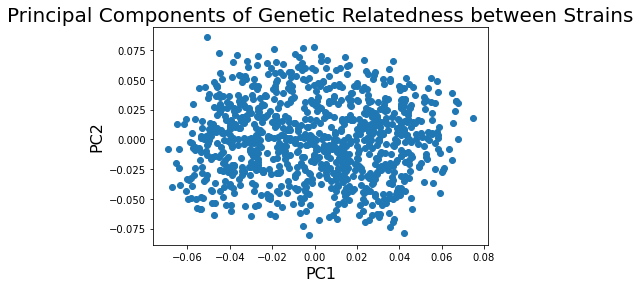

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = pca[2], y = pca[3])
ax.set_title('Principal Components of Genetic Relatedness between Strains', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)

# Question 2

In [6]:
allele_freq = []
vcf = open('renum_chr.vcf', 'r')
#iterate through each line
for line in vcf:
    #skip header lines
    if re.match('^#', line):
        continue
    #split each by whitespace into columns
    line_split = line.rstrip().split()
    if re.match('^AF=', line_split[7]):
        if len(re.split('=|,', line_split[7])) > 2:
            for freq in re.split('=|,', line_split[7])[1:]:
                allele_freq.append(float(freq))
        else:
            allele_freq.append(float(re.split('=', line_split[7])[1]))
vcf.close()
allele_freq

[0.690206,
 0.710472,
 0.565776,
 0.503932,
 0.712679,
 0.713408,
 0.695903,
 0.493498,
 0.496109,
 0.5215,
 0.529564,
 0.524582,
 0.518839,
 0.522523,
 0.519038,
 0.540366,
 0.536523,
 0.528079,
 0.52593,
 0.522124,
 0.530378,
 0.515259,
 0.536906,
 0.525758,
 0.528246,
 0.530303,
 0.527832,
 0.519578,
 0.537856,
 0.532875,
 0.530969,
 0.534449,
 0.531746,
 0.542487,
 0.533129,
 0.538038,
 0.519527,
 0.533438,
 0.532022,
 0.533777,
 0.53719,
 0.531,
 0.521161,
 0.524465,
 0.520813,
 0.525077,
 0.524341,
 0.530969,
 0.526367,
 0.532321,
 0.52997,
 0.53656,
 0.52704,
 0.524823,
 0.52071,
 0.520854,
 0.527944,
 0.481481,
 0.520098,
 0.518868,
 0.521973,
 0.52359,
 0.524029,
 0.524898,
 0.532325,
 0.531414,
 0.517734,
 0.516256,
 0.520568,
 0.519704,
 0.520588,
 0.515764,
 0.519763,
 0.513444,
 0.514028,
 0.520876,
 0.526052,
 0.527641,
 0.516333,
 0.524327,
 0.519677,
 0.523303,
 0.514811,
 0.517188,
 0.514736,
 0.509585,
 0.5143,
 0.512,
 0.515984,
 0.51769,
 0.525,
 0.516899,
 0.518299

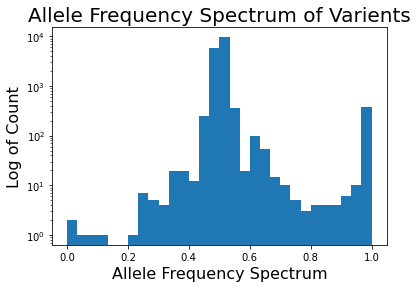

In [7]:
#plot figure
fig, ax = plt.subplots()
ax.hist(allele_freq, bins=30)
ax.set_title('Allele Frequency Spectrum of Varients', fontsize = 20)
ax.set_ylabel('Log of Count', fontsize = 16)
ax.set_yscale('log')
ax.set_xlabel('Allele Frequency Spectrum', fontsize = 16)
plt.show()

# Question 3

In [8]:
file_lines = []
pheno = open('BYxRM_PhenoData.txt', 'r')
for line in pheno:
    if 'Cadmium' in line:
        line = "FID\tIID\t" + line
    else:
        split = line.split("_")
        line = split[0] + "\t" + split[1]
    file_lines.append(line)
np.savetxt("id_sep.txt", file_lines, fmt="%s")

In [9]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/week3-assignment/renum_chr.vcf \
  --pheno /Users/cmdb/qbb2020-answers/week3-assignment/id_sep.txt \
  --linear \
  --all-pheno \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/week3-assignment/id_sep.txt
  --vcf /Users/cmdb/qbb2020-answers/week3-assignment/renum_chr.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies

# Question 4

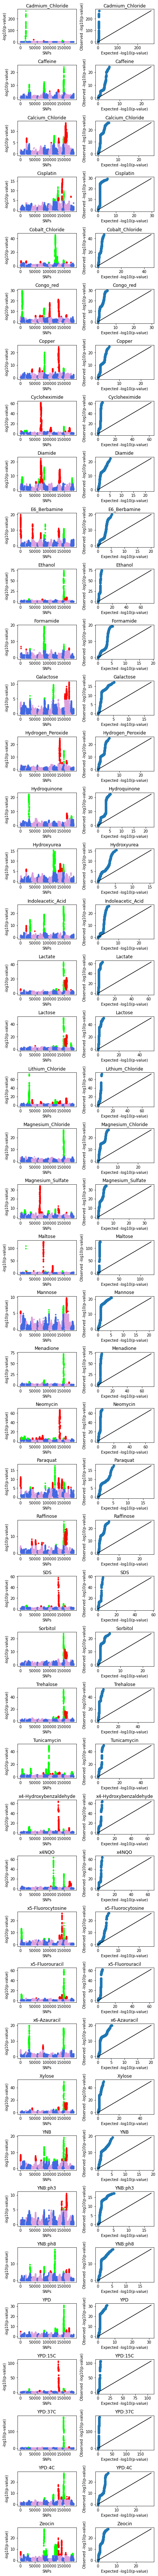

In [10]:
phenotypes = ["Cadmium_Chloride", "Caffeine", "Calcium_Chloride", "Cisplatin", "Cobalt_Chloride", "Congo_red", "Copper","Cycloheximide", "Diamide", "E6_Berbamine", "Ethanol", "Formamide", "Galactose", "Hydrogen_Peroxide", "Hydroquinone", "Hydroxyurea", "Indoleacetic_Acid", "Lactate", "Lactose", "Lithium_Chloride", "Magnesium_Chloride", "Magnesium_Sulfate", "Maltose", "Mannose", "Menadione", "Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", "x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]
chrom = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26]
color_non_sig = ["plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum", "royalblue", "plum"]
color_sig = ["red", "lime", "red", "lime", "red", "lime", "red", "lime", "red", "lime", "red", "lime", "red", "lime", "red", "lime", "red"]
fig, axs = plt.subplots(46, 2)
fig.set_figheight(96)
for row in range(0, 46):
    gwas = pd.read_csv("plink." + phenotypes[row] + ".assoc.linear", sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    for val in range(0, len(chrom)):
        axs[row][0].scatter(gwas["snp_index"][gwas["CHR"] == chrom[val]][gwas["logP"] < 5][gwas["TEST"]=='ADD'], gwas["logP"][gwas["CHR"] == chrom[val]][gwas["logP"] < 5][gwas["TEST"]=='ADD'], marker = '.', color = color_non_sig[val])
        axs[row][0].scatter(gwas["snp_index"][gwas["CHR"] == chrom[val]][gwas["logP"] >= 5][gwas["TEST"]=='ADD'], gwas["logP"][gwas["CHR"] == chrom[val]][gwas["logP"] >= 5][gwas['TEST']=='ADD'], marker = '.', color = color_sig[val])
    axs[row][0].set_xlabel("SNPs")
    axs[row][0].set_ylabel("-log10(p-value)")
    axs[row][0].set_title(phenotypes[row])
    
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    axs[row][1].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    axs[row][1].plot([max(gwas_sorted["logP"]),0], [max(gwas_sorted["logP"]),0], color = "black")
    axs[row][1].set_xlabel("Expected -log10(p-value)")
    axs[row][1].set_ylabel("Observed -log10(p-value)")
    axs[row][1].set_title(phenotypes[row])
plt.tight_layout()

# Question 5

In [11]:
gwas = pd.read_csv("plink.Cadmium_Chloride.assoc.linear", sep = "\s+")
gwas.sort_values("P")

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
18447,2,.,795756,C,ADD,706,-5.756,-58.39,5.079000e-270
18458,2,.,798782,A,ADD,713,-5.613,-52.20,9.913000e-244
18469,2,.,799317,A,ADD,707,-5.570,-50.01,1.837000e-232
18480,2,.,799991,G,ADD,712,-5.564,-49.65,1.481000e-231
18513,2,.,800746,C,ADD,720,5.513,49.06,6.023000e-230
...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,673,NaN,NaN,NaN
182090,16,.,890346,T,COV7,673,NaN,NaN,NaN
182091,16,.,890346,T,COV8,673,NaN,NaN,NaN
182092,16,.,890346,T,COV9,673,NaN,NaN,NaN


In [12]:
%%bash
grep "#CHROM" BYxRM_segs_saccer3.bam.simplified.vcf > chrII_795756_genotype.txt
grep "chrII" BYxRM_segs_saccer3.bam.simplified.vcf | grep "795756" >> chrII_795756_genotype.txt

In [13]:
geno = pd.read_csv("chrII_795756_genotype.txt", sep = "\s+", header = None)
geno = geno.iloc[:,9:].T.rename(columns={0:'subject_id', 1:'genotype:read_depth'})

In [14]:
pheno = pd.read_csv('id_sep.txt', '\s+')
pheno['subject_id'] = pheno['FID'].astype(str) + "_" + pheno['IID'].astype(str)
pheno = pheno[['subject_id', 'Cadmium_Chloride']]

In [15]:
CadCl_genotype = pd.merge(geno, pheno, on = "subject_id")
CadCl_genotype

,subject_id,genotype:read_depth,Cadmium_Chloride
0,A01_10,0/0:4,-8.144131
1,A01_11,1/1:10,8.899816
2,A01_12,0/0:5,-1.369245
3,A01_13,1/1:8,6.099126
4,A01_14,0/0:1,-6.128808
...,...,...,...
907,A11_92,0/0:2,-4.262720
908,A11_93,0/0:1,-10.147285
909,A11_94,1/1:5,NaN
910,A11_95,1/1:1,NaN


In [16]:
CC = [] #0/0
CG = [] #0/1
GG = [] #1/1
for row in range(0, len(CadCl_genotype)):
    if math.isnan(CadCl_genotype.iloc[row][2]) or './.' in CadCl_genotype.iloc[row][1]:
        continue
    elif '0/0' in CadCl_genotype.iloc[row][1]:
        CC.append(CadCl_genotype.iloc[row].loc['Cadmium_Chloride'])
    elif '0/1' in CadCl_genotype.iloc[row][1]:
        CG.append(CadCl_genotype.iloc[row].loc['Cadmium_Chloride'])
    elif '1/1' in CadCl_genotype.iloc[row][1]:
        GG.append(CadCl_genotype.iloc[row].loc['Cadmium_Chloride'])

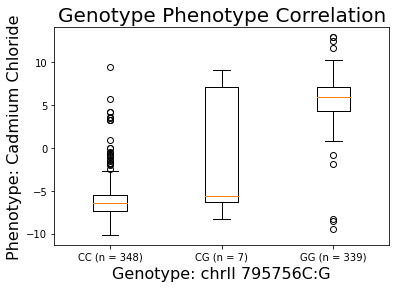

In [17]:
#plot figure
data = [CC, CG, GG]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['CC (n = ' + str(len(CC)) + ')', 'CG (n = ' + str(len(CG)) + ')', 'GG (n = ' + str(len(GG)) + ')'])
ax.set_title('Genotype Phenotype Correlation', fontsize = 20)
ax.set_ylabel('Phenotype: Cadmium Chloride', fontsize = 16)
ax.set_xlabel('Genotype: chrII 795756C:G', fontsize = 16)
plt.show()